<a href="https://colab.research.google.com/github/srieesh20/pythonprograms/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction



Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.

However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to delve into the factors influencing the demand for their shared electric cycles, specifically in the Indian market.

**Import the dataset and do usual exploratory data analysis
steps like checking the structure & characteristics of the
dataset**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i

Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 51.8MB/s]


In [ ]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.groupby('season')['season'].count()

season
1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64

In [ ]:
df.groupby('holiday')['holiday'].count()

holiday
0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df.groupby('workingday')['workingday'].count()

workingday
0    3474
1    7412
Name: workingday, dtype: int64

In [ ]:
df.groupby('weather')['weather'].count()

weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

**From the above analysis we can see that weather,working day,holiday,season are categorical columns**

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


Casual and Registered attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no Null values in the data

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['season']=df['season'].astype('object')
df['holiday']=df['holiday'].astype('object')
df['workingday']=df['workingday'].astype('object')
df['weather']=df['weather'].astype('object')
#converting datetime column to date time
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
#Creating categorical values for season column
def season(x):
  if x==1:
    return "Spring"
  elif x==2:
    return "summer"
  elif x==3:
    return "fall"
  elif x==4:
    return "winter"

df['season']=df['season'].apply(season)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1


<ipython-input-57-f93c69e66028>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


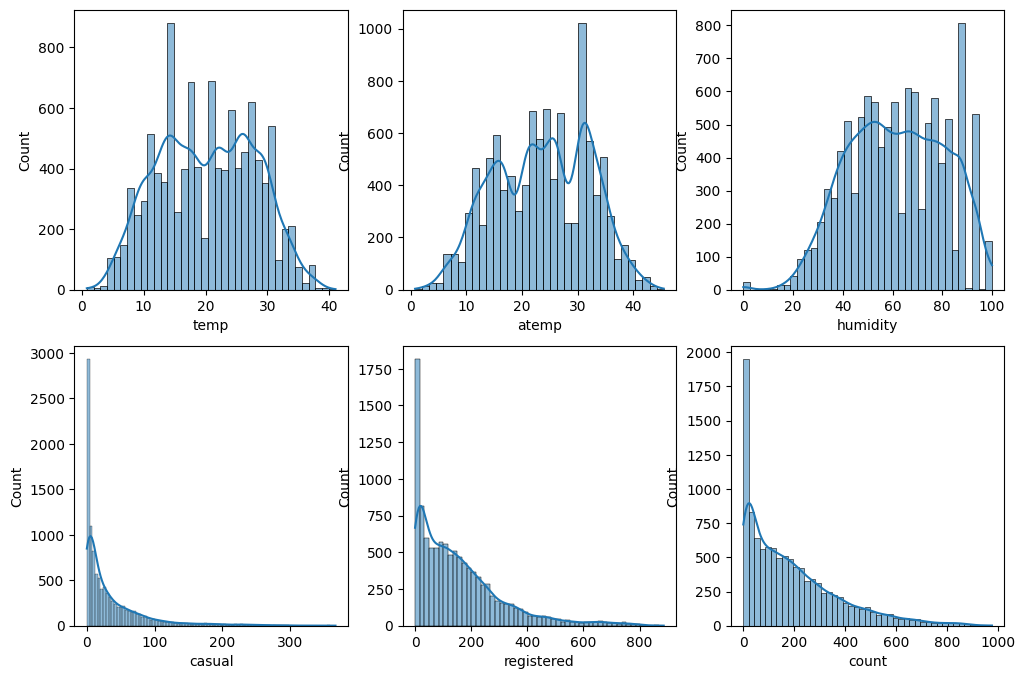

In [ ]:
plt.subplots(figsize=(12,8))

plt.subplot(2,3,1)
sns.histplot(df['temp'],kde=True)


plt.subplot(2,3,2)
sns.histplot(df['atemp'],kde=True)

plt.subplot(2,3,3)
sns.histplot(df['humidity'],kde=True)


plt.subplot(2,3,4)
sns.histplot(df['casual'],kde=True)


plt.subplot(2,3,5)
sns.histplot(df['registered'],kde=True)

plt.subplot(2,3,6)
sns.histplot(df['count'],kde=True)

plt.show()

<Axes: xlabel='windspeed', ylabel='Count'>

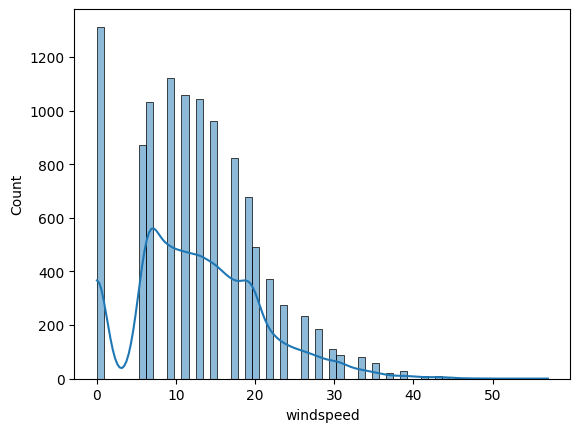

In [ ]:
sns.histplot(df['windspeed'],kde=True)

casual, registered and count looks like Log Normal Distribution

temp, atemp and humidity looks like  Normal Distribution

<ipython-input-62-a789afc32914>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


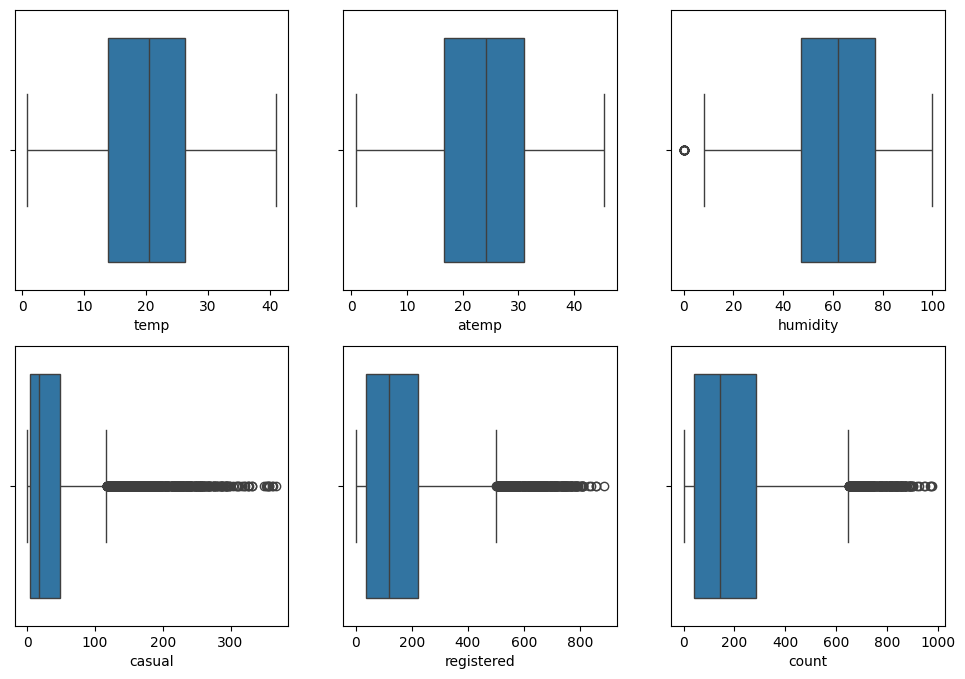

In [ ]:
plt.subplots(figsize=(12,8))

plt.subplot(2,3,1)
sns.boxplot(df['temp'],orient='h')


plt.subplot(2,3,2)
sns.boxplot(df['atemp'],orient='h')

plt.subplot(2,3,3)
sns.boxplot(df['humidity'],orient='h')


plt.subplot(2,3,4)
sns.boxplot(df['casual'],orient='h')


plt.subplot(2,3,5)
sns.boxplot(df['registered'],orient='h')

plt.subplot(2,3,6)
sns.boxplot(df['count'],orient='h')

plt.show()

<Axes: xlabel='windspeed'>

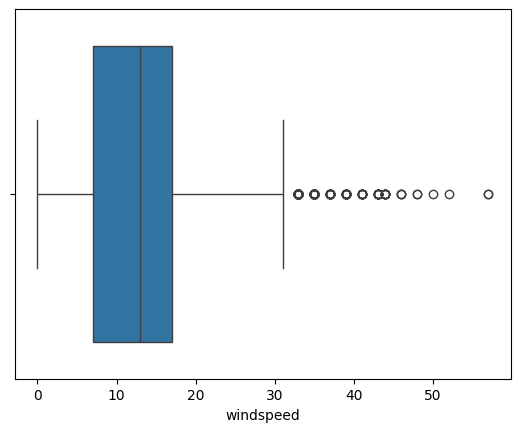

In [ ]:
sns.boxplot(df['windspeed'],orient='h')

humidity, casual, registered and count have outliers in the data.

<ipython-input-73-95b9e473f7c1>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


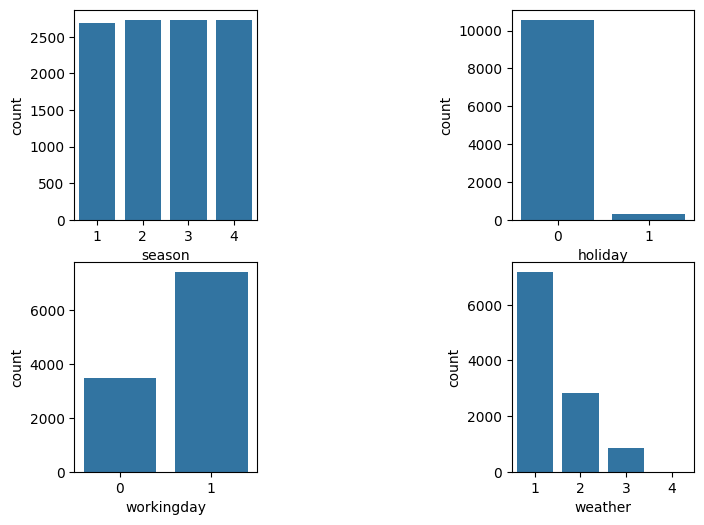

In [ ]:
plt.subplots(figsize=(8,6))

plt.subplot(2,3,1)
sns.countplot(x=df['season'])


plt.subplot(2,3,3)
sns.countplot(x=df['holiday'])

plt.subplot(2,3,4)
sns.countplot(x=df['workingday'])


plt.subplot(2,3,6)
sns.countplot(x=df['weather'])


plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

<ipython-input-75-c5235b8c440c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


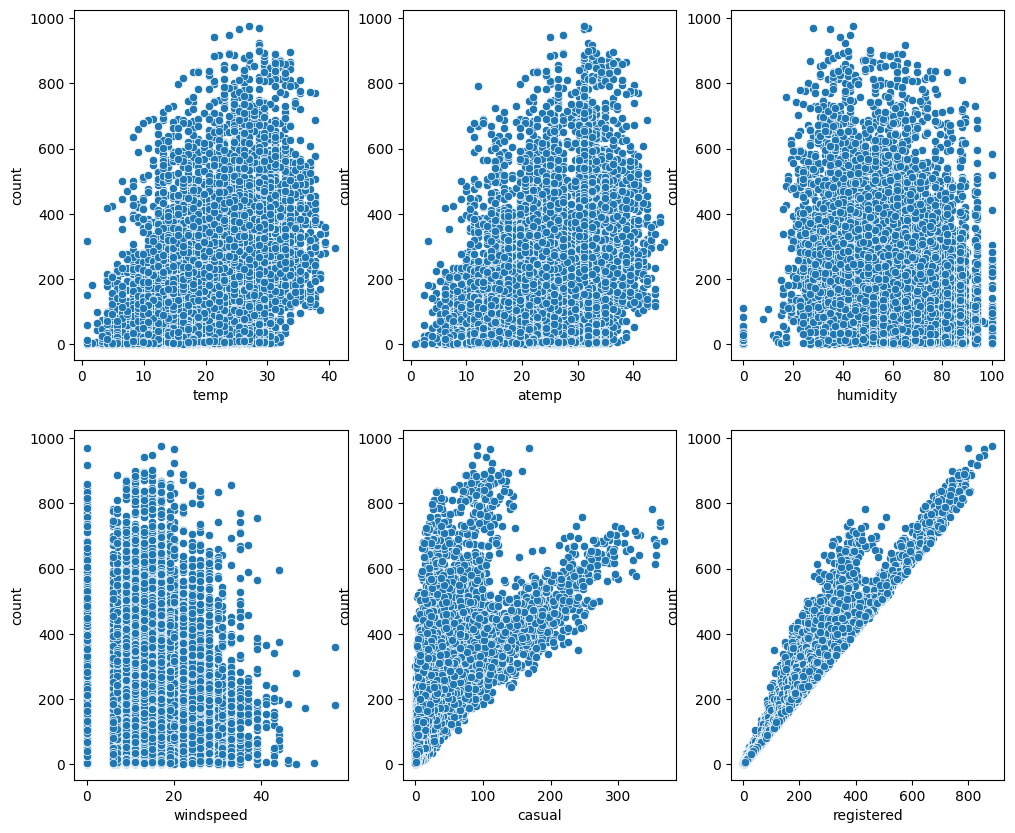

In [ ]:
plt.subplots(figsize=(12,10))

plt.subplot(2,3,1)
sns.scatterplot(y=df['count'],x=df['temp'])


plt.subplot(2,3,2)
sns.scatterplot(y=df['count'],x=df['atemp'])

plt.subplot(2,3,3)
sns.scatterplot(y=df['count'],x=df['humidity'])


plt.subplot(2,3,4)
sns.scatterplot(y=df['count'],x=df['windspeed'])


plt.subplot(2,3,5)
sns.scatterplot(y=df['count'],x=df['casual'])

plt.subplot(2,3,6)
sns.scatterplot(y=df['count'],x=df['registered'])

plt.show()

When the humidity is less than 20, number of bikes rented is very very low.

When the temperature is less than 10, number of bikes rented is less.

When the windspeed is greater than 35, number of bikes rented is less.

**Bi-variate analysis**

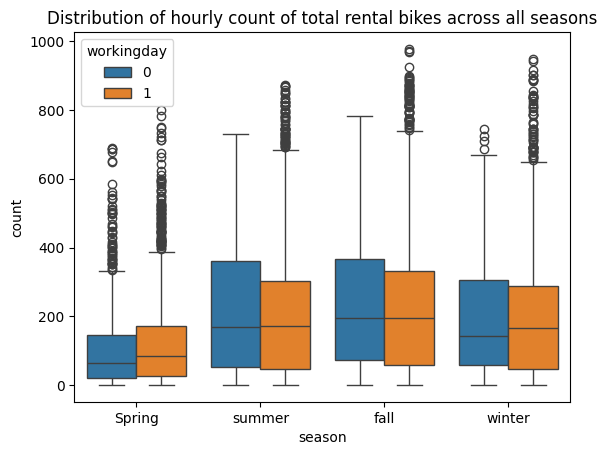

In [ ]:
sns.boxplot(df,x='season',y='count',hue='workingday')
plt.title('Distribution of hourly count of total rental bikes across all seasons')
plt.show()

The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

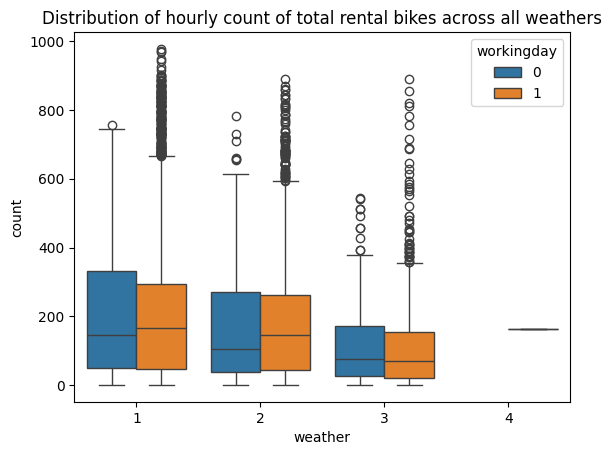

In [ ]:
sns.boxplot(df,x='weather',y='count',hue='workingday')
plt.title('Distribution of hourly count of total rental bikes across all weathers')
plt.show()

The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

##Relationship between the Dependent and Independent Variables.

In [ ]:
corr=df.corr()
corr

<ipython-input-4-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

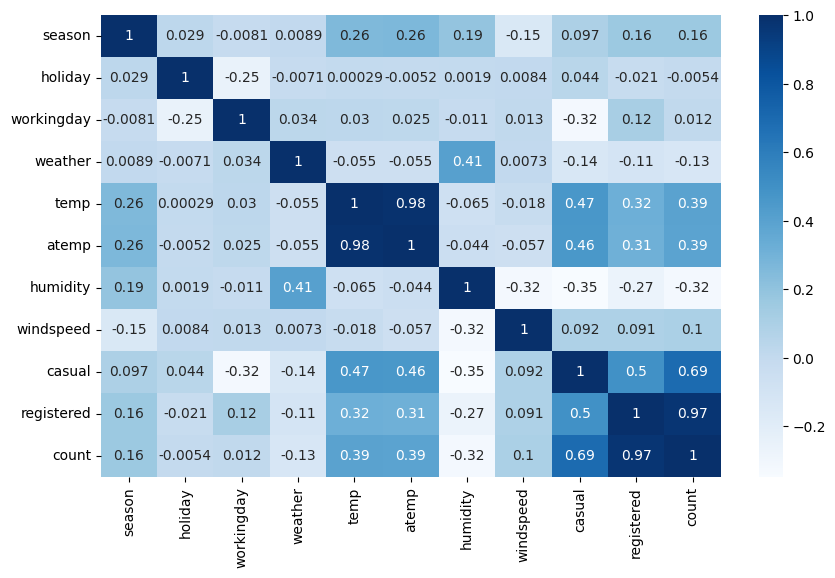

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='Blues')

Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]

High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.

Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].

Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1


##Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [ ]:
not_workingday=df[df['workingday']==0]['count']
workingday=df[df['workingday']==1]['count']


In [ ]:
#ho: there is no significant difference between no of bike rides on weekdays and weekends
#ha: there is difference between no of bike rides on weekdays and weekends
alpha=0.05
t_stat, pvalue=stats.ttest_ind(not_workingday,workingday)

print('p- value =',pvalue)
if pvalue<alpha:
  print('reject null hypothesis, there is difference between bike rides on weekdays and weekends')
else:
  print('fail to reject null hypothesis, there is no  difference between bike rides on weekdays and weekends')

p- value = 0.22644804226361348
fail to reject null hypothesis, there is no  difference between bike rides on weekdays and weekends


##Check if the Weather conditions are significantly different during different Seasons?

In [ ]:
pd.crosstab(index=df['holiday'],columns=df['workingday'],normalize=True)

workingday,0,1
holiday,,
0,0.290557,0.680875
1,0.028569,0.000000


In [ ]:
observed_weather_season=pd.crosstab(index=df['weather'],columns=df['season'])
observed_weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
from scipy.stats import chi2_contingency

#Null Hypothesis ( H0 ) - weather is independent of season
#Alternate Hypothesis ( HA ) - weather is dependent of seasons.

#Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.
alpha=0.05

chi_stat,p_value,df,exp_freq=chi2_contingency(observed_weather_season)
print("Chi stat:", chi_stat)
print("P Value:", p_value)

if(p_value<alpha):
  print('Reject null hypothesis, weather is dependent on season')
else:
  print('fail to reject null hypothesis, weather is not dependent on season')

Chi stat: 49.15865559689363
P Value: 1.5499250736864862e-07
Reject null hypothesis, weather is dependent on season


Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

##Check if the demand of bicycles on rent is the same for different Weather condtions

In [ ]:
from scipy.stats import f_oneway

In [ ]:
weather1=df[df['weather']==1]['count']
weather2=df[df['weather']==2]['count']
weather3=df[df['weather']==3]['count']
weather4=df[df['weather']==4]['count']
print(len(weather1),len(weather2),len(weather3),len(weather4))

7192 2834 859 1


 Set up Null Hypothesis for ANOVA

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for wether 1,2,3 and 4 are different.





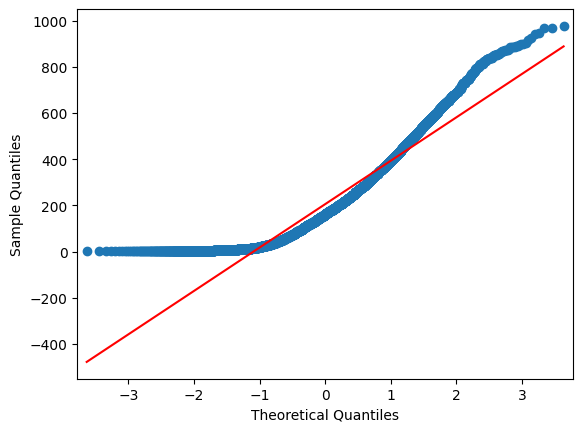

In [ ]:
#Checking normal distribution using Q-Q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(weather1, line="s")
plt.show()

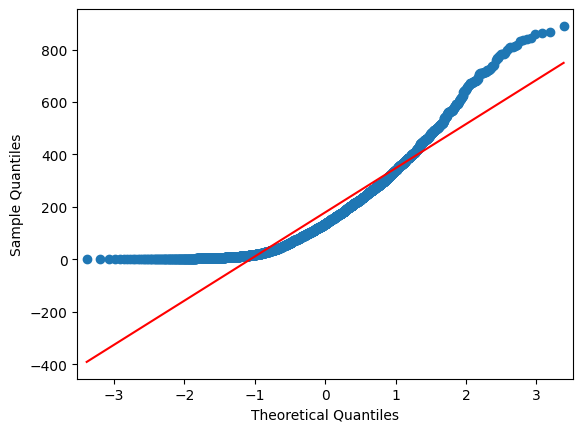

In [ ]:
qqplot(weather2, line="s")
plt.show()

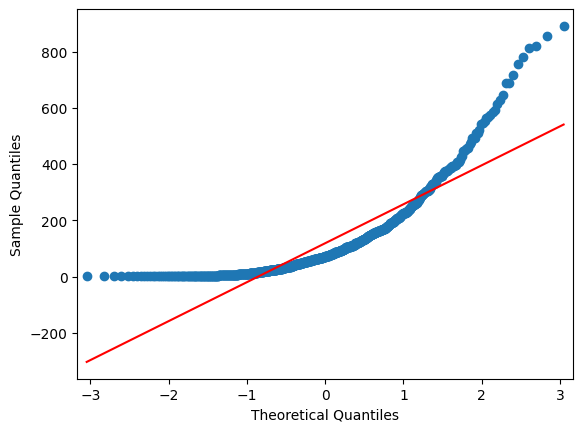

In [ ]:
qqplot(weather3, line="s")
plt.show()

It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

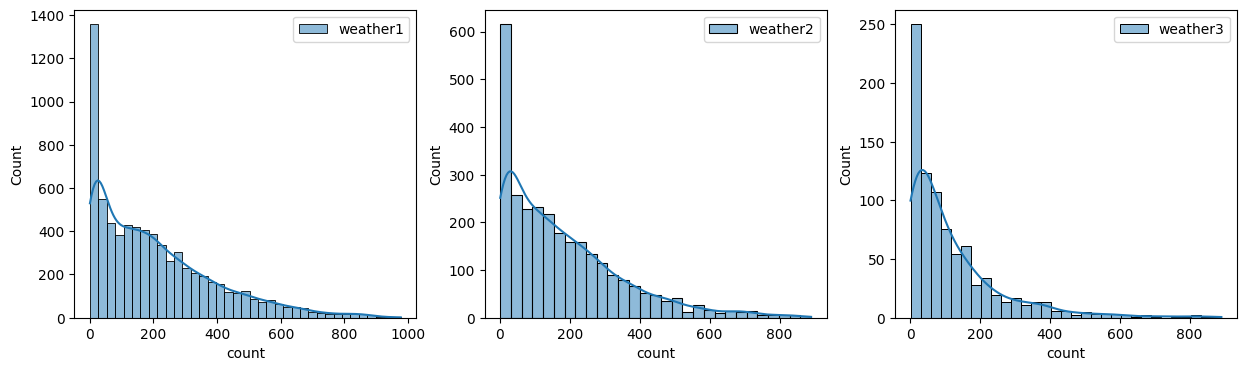

In [ ]:
#Cheking normal distribution using Histplot
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(weather1,kde=True,label='weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(weather2,kde=True,label='weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(weather3,kde=True,label='weather3')
plt.legend()
plt.plot()

We can see all 3 weather hist plots are not normally distributed

Applying Shapiro-Wilk test for normality
Ho : The sample follows normal distribution
Ha : The sample does not follow normal distribution


Test Statistics : Shapiro-Wilk test for normality

In [ ]:

from scipy.stats import shapiro
alpha=0.05

test_stat, p_val = shapiro(weather1.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

6.759548573960421e-17
reject Ho, the sample does not follow normal distribution


In [ ]:
alpha=0.05

test_stat, p_val = shapiro(weather2.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

6.940311588079568e-20
reject Ho, the sample does not follow normal distribution


In [ ]:
alpha=0.05

test_stat, p_val = shapiro(weather3.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

1.0933759287410975e-26
reject Ho, the sample does not follow normal distribution


all 3 weather categories dont follow normal distribution, so lets check with Levene test

In [ ]:
from scipy.stats import levene

# H0: variances are equal
# H1: variances are not equal

alpha=0.05

stat,pvalue=levene(weather1.sample(500),weather2.sample(500),weather3.sample(500))
print('p-value',pvalue)


if p_value<alpha:
  print('reject ho, variances are not equal ')
else:
  print('fail to reject ho,variances are equal for all 3 weather')

p-value 3.947949877855303e-17
reject ho, variances are not equal 


Since the samples are not normally distributed and do not have the same variance,f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = stats.kruskal(weather1,weather2,weather3)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45
Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different weathers.

##Check if the demand of bicycles on rent is the same for different Seasons

In [ ]:
spring=df[df['season']==1]['count']
summer=df[df['season']==2]['count']
fall=df[df['season']==3]['count']
winter=df[df['season']==4]['count']
print(len(spring),len(summer),len(fall),len(winter))

2686 2733 2733 2734


ANOVA test

Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for all seasons

Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.





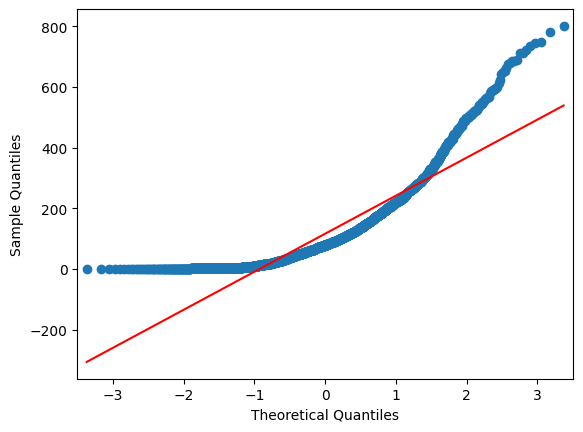

In [ ]:
#Checking normal distribution using Q-Q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(spring, line="s")
plt.show()

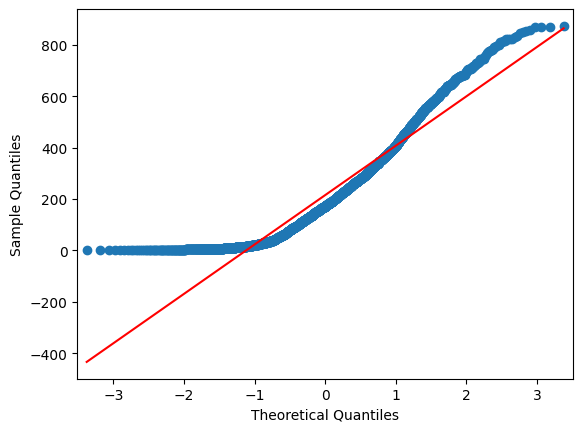

In [ ]:
qqplot(summer, line="s")
plt.show()

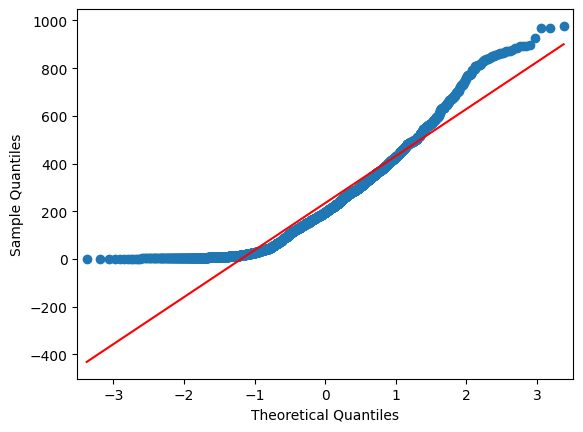

In [ ]:
qqplot(fall, line="s")
plt.show()

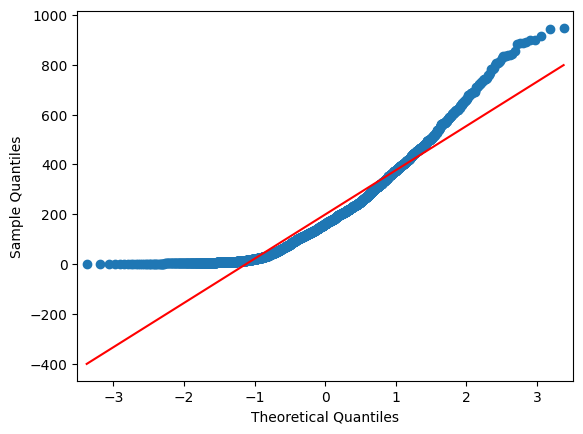

In [ ]:
qqplot(winter, line="s")
plt.show()

It can be inferred from the above plot that the distributions do not follow normal distribution.

[]

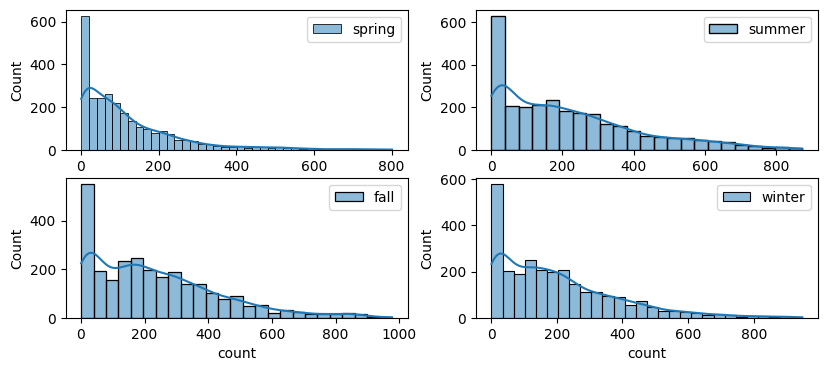

In [ ]:
#Cheking normal distribution using Histplot
plt.figure(figsize = (15, 4))
plt.subplot(2, 3, 1)
sns.histplot(spring,kde=True,label='spring')
plt.legend()
plt.subplot(2, 3, 2)
sns.histplot(summer,kde=True,label='summer')
plt.legend()
plt.subplot(2, 3, 4)
sns.histplot(fall,kde=True,label='fall')
plt.legend()
plt.subplot(2, 3, 5)
sns.histplot(winter,kde=True,label='winter')
plt.legend()
plt.plot()

We can see all 4 seasons hist plots are not normally distributed

Applying Shapiro-Wilk test for normality
Ho : The sample follows normal distribution
Ha : The sample does not follow normal distribution


Test Statistics : Shapiro-Wilk test for normality

In [ ]:

from scipy.stats import shapiro
alpha=0.05

test_stat, p_val = shapiro(spring.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

9.509984058564357e-24
reject Ho, the sample does not follow normal distribution


In [ ]:
alpha=0.05

test_stat, p_val = shapiro(summer.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

2.0732709644657752e-17
reject Ho, the sample does not follow normal distribution


In [ ]:
alpha=0.05

test_stat, p_val = shapiro(fall.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

2.2198029394851103e-15
reject Ho, the sample does not follow normal distribution


In [ ]:
alpha=0.05

test_stat, p_val = shapiro(winter.sample(500))

print(p_val)

if p_val<alpha:
  print('reject Ho, the sample does not follow normal distribution')
else:
  print('Fail to reject Ho,the sample follows normal distribution')

1.7383097175225307e-18
reject Ho, the sample does not follow normal distribution


all 4 seasons  dont follow normal distribution, so lets check with Levene test

In [ ]:
from scipy.stats import levene

# H0: variances are equal
# H1: variances are not equal

alpha=0.05

stat,pvalue=levene(spring.sample(500),summer.sample(500),fall.sample(500),winter.sample(500))
print('p-value',pvalue)


if p_value<alpha:
  print('reject ho, variances are not equal ')
else:
  print('fail to reject ho,variances are equal for all 3 weather')

p-value 8.224645067163879e-20
reject ho, variances are not equal 


Since the samples are not normally distributed and do not have the same variance,f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
# Ho : Mean no. of cycles rented is same for different seasons
# Ha : Mean no. of cycles rented is different for different season
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = stats.kruskal(spring,summer,fall,winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151
Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different seasons

##Recommendations


Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

Weather-based Promotions: Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

Improve Weather Data Collection: Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

Customer Comfort: Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

Collaborations with Weather Services: Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

Special Occasion Discounts: Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.